In [12]:
import numpy as np
import nnfs
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data

here


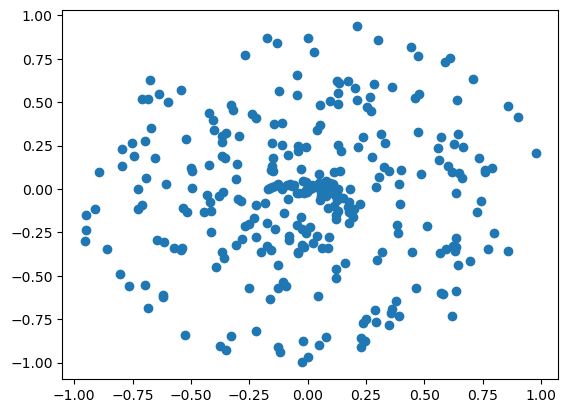

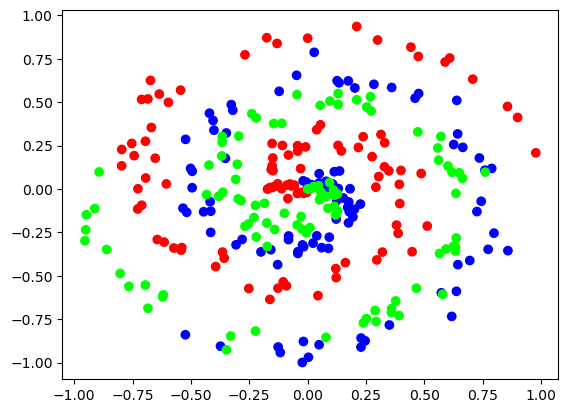

In [10]:
# Create Data set

def create_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number,points*(class_number+1))
        r = np.linspace(0.0, 1, points) #radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

print("here")
X, y = create_data(100, 3)

plt.scatter(X[:,0], X[:,1])
plt.show()

plt.scatter(X[:,0], X[:,1], c=y, cmap="brg")
plt.show()

In [25]:
#Putting things in terms of classes

nnfs.init()  #From SentDex tutorial to use same numbers/datasets that he used


class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights= 0.10*np.random.randn(n_inputs, n_neurons)
        self.biases=np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        self.output=np.dot(inputs, self.weights)+self.biases

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

# Softmax is used when you only want 1(red or green or blue) not 
# two or three. One. This constraint is helpful here but could be 
# probalamatic in image detection when there are more than one thing to
# identify. Also it assumes the image will have at least one of a given thing
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

class Loss_CategoricalCrossEntropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
        
        if len(y_true.shape) ==1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape)==2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
        
        negative_log_likelyhoods = -np.log(correct_confidences)
        return negative_log_likelyhoods

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 3)

activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)

activation2 = Activation_Softmax()

loss_function=Loss_CategoricalCrossEntropy()

dense1.forward(X)

activation1.forward(dense1.output)

dense2.forward(activation1.output)

activation2.forward(dense2.output)

print(activation2.output[:5])

loss=loss_function.calculate(activation2.output, y)

print("Loss:", loss)

predictions = np.argmax(activation2.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions==y)

# Print accuracy
print('acc:', accuracy)

[[0.33333334 0.33333334 0.33333334]
 [0.33331734 0.33331832 0.33336434]
 [0.3332888  0.33329153 0.33341965]
 [0.33325943 0.33326396 0.33347666]
 [0.33323312 0.33323926 0.33352762]]
Loss: 1.098445
acc: 0.34
